<a href="https://colab.research.google.com/github/Mercy-Njambi/Image-Classification-with-CNN/blob/main/Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION WITH DEEP LEARNING

## 1. Business understanding


### 1.1 Data Analytic Question & Problem Statement

Tibabu Hospital did a research on the accuracy of **Pneumonia diagnosis**. 
The the results were  not impressive. So to improve diagnosis of pneumonia using x-rays, tasked us to come up with a solution.

The task is to come up with a **classification algorithm** that will determine if a patient has pneumonia or not based on their chest X-ray image(s).


### 1.2 Problem Context


### 1.3 Metric of Success

The algorithm will be considered a success if the predictions made by it have a:

- **ROC -AUC
- **Precision
- **Recall
- **Accuracy** of *90% - 96%*


## 2. Data Understanding

The medical dataset contains a set of x-ray images of pediatric patients. 
The images are of patients who have pneumonia and those who don't.

The task is to build a model that can classify whether a given patient has pneumonia given  their chest x-ray image. 

Since this is an Image Classification problem, Deep Learning is the ideal solving method.



### 2.1 The Dataset

The dataset used contains two categories: 

  - **Pneumonia** = 1
  - **Normal** = 0
  
The origin of the data used is [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). 
It was downloaded then uploaded to a shared google drive. 

The data is assigned two folders, train and test. Both of the folders contain a subfolder of Pneumonia and Normal images.

To check how many samples are in each category, the OS.listdir method is applied.

## Project Plan

1. Load and Pre-process the data.
2. Define the trained generator, validation generator, and test generator.
2. Build a baseline model.
3. Build the deep learning model base. Then, train the model with selected images.
4. Retrain the model with complete training data. 
5. Evaluate the model with the test images.

## 3. Loading the Data

### 3.1 Loading the Libraries

Connecting to Google drive and Importing all the necessary Libraries | Modules.

In [ ]:
# connecting collab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
# import all relevant libraries

import numpy as np 
import pandas as pd
import os, shutil

# visualization libraries

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

# tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Activation, Dropout, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, Input
#from tensorflow.keras.wrappers import scikit_learn
from scikeras.wrappers import KerasClassifier

# sklearn

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### 3.2 Loading the Data

Load the data using `os.listdir` method

In [ ]:
# print the contents of the chest_xray folder 

print(os.listdir('/content/drive/Shareddrives/Avengers/chest_xray'))

['test', 'val', 'train']


Storing the data for both normal and pneumonia x-ray images into variables for easy access. 

Doing this for both the train and test data.

In [ ]:
# store the directory paths as variables

train_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/NORMAL'
train_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/PNEUMONIA'

test_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/NORMAL'
test_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/PNEUMONIA'

In [ ]:
# store train normal xrays and pneumonia xrays as variables.

train_norm_images = os.listdir(train_norm_dir)
train_pneu_images = os.listdir(train_pneu_dir)

# store train normal xrays and pneumonia x-rays as variables.

test_norm_images = os.listdir(test_norm_dir)
test_pneu_images = os.listdir(test_pneu_dir)

Viewing sample images from the directories specified above.

### Normal image

In [ ]:
# print the files in the train normal folder

print(train_norm_images)

['IM-0523-0001-0002.jpeg', 'IM-0523-0001-0003.jpeg', 'IM-0519-0001-0002.jpeg', 'IM-0511-0001-0001.jpeg', 'IM-0513-0001.jpeg', 'IM-0512-0001.jpeg', 'IM-0523-0001.jpeg', 'IM-0517-0001-0001.jpeg', 'IM-0516-0001.jpeg', 'IM-0525-0001-0002.jpeg', 'IM-0536-0001.jpeg', 'IM-0546-0001.jpeg', 'IM-0533-0001-0001.jpeg', 'IM-0533-0001-0002.jpeg', 'IM-0544-0001.jpeg', 'IM-0539-0001-0001.jpeg', 'IM-0543-0001.jpeg', 'IM-0535-0001.jpeg', 'IM-0539-0001-0002.jpeg', 'IM-0534-0001.jpeg', 'IM-0542-0001.jpeg', 'IM-0540-0001.jpeg', 'IM-0549-0001-0001.jpeg', 'IM-0541-0001.jpeg', 'IM-0553-0001-0002.jpeg', 'IM-0549-0001.jpeg', 'IM-0545-0001-0001.jpeg', 'IM-0545-0001-0002.jpeg', 'IM-0543-0001-0002.jpeg', 'IM-0551-0001-0001.jpeg', 'IM-0532-0001.jpeg', 'IM-0552-0001.jpeg', 'IM-0549-0001-0002.jpeg', 'IM-0545-0001.jpeg', 'IM-0539-0001.jpeg', 'IM-0538-0001.jpeg', 'IM-0547-0001.jpeg', 'IM-0551-0001-0002.jpeg', 'IM-0553-0001-0001.jpeg', 'IM-0533-0001.jpeg', 'IM-0531-0001.jpeg', 'IM-0548-0001.jpeg', 'IM-0551-0001.jpeg', '

### Checking the data

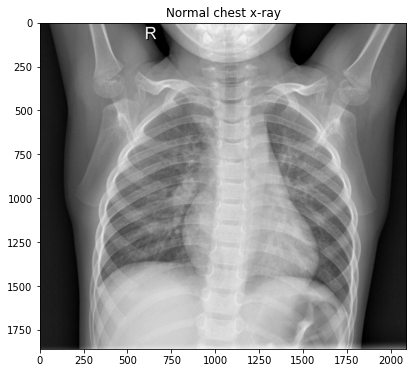

In [ ]:
# Display an image from the train NORMAL folder.

img_name_normal = '/IM-0115-0001.jpeg'
normal_lung = load_img(train_norm_dir + img_name_normal)

# normal chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(normal_lung)
plt.title('Normal chest x-ray')

plt.show()

### Pneumonia image

In [ ]:
# print the files in the train pneumonia folder

print(train_pneu_images)

['person504_bacteria_2130.jpeg', 'person502_virus_1011.jpeg', 'person510_bacteria_2150.jpeg', 'person541_bacteria_2275.jpeg', 'person496_virus_1003.jpeg', 'person531_virus_1053.jpeg', 'person548_virus_1088.jpeg', 'person551_bacteria_2310.jpeg', 'person539_bacteria_2270.jpeg', 'person545_bacteria_2288.jpeg', 'person51_bacteria_240.jpeg', 'person510_bacteria_2149.jpeg', 'person51_bacteria_245.jpeg', 'person492_bacteria_2083.jpeg', 'person511_virus_1027.jpeg', 'person525_bacteria_2216.jpeg', 'person527_virus_1048.jpeg', 'person535_bacteria_2256.jpeg', 'person543_bacteria_2280.jpeg', 'person556_virus_1096.jpeg', 'person543_virus_1073.jpeg', 'person531_bacteria_2240.jpeg', 'person51_bacteria_239.jpeg', 'person526_bacteria_2221.jpeg', 'person518_bacteria_2198.jpeg', 'person557_virus_1097.jpeg', 'person531_bacteria_2242.jpeg', 'person495_virus_1001.jpeg', 'person500_bacteria_2107.jpeg', 'person494_virus_1000.jpeg', 'person549_bacteria_2303.jpeg', 'person517_bacteria_2196.jpeg', 'person514_bac

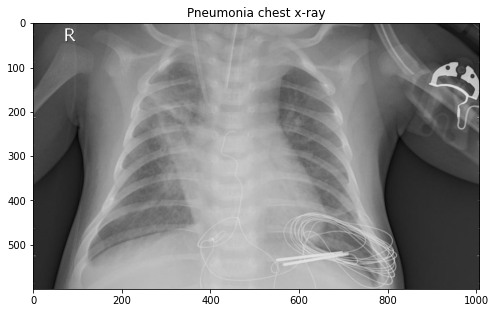

In [ ]:
# Display an image from the train PNEUMONIA folder.

img_name_pneumonia = '/person504_bacteria_2130.jpeg'
pneumonia_lung = load_img(train_pneu_dir + img_name_pneumonia)

# pneumonia chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(pneumonia_lung)
plt.title('Pneumonia chest x-ray')

plt.show()

Exploring the shape of both the images and the label sets of the train and test data.

In [ ]:
# preview the size of train data

print('Train data count of Normal chest images is:', np.shape(train_norm_images)[0])
print('Train data count of Pneumonia chest images is:', np.shape(train_pneu_images)[0])

Train data count of Normal chest images is: 1341
Train data count of Pneumonia chest images is: 3885


In [ ]:
# preview the size of test data

print('Test data count of Normal chest images is:', np.shape(test_norm_images)[0])
print('Test data count of Pneumonia chest images is:', np.shape(test_pneu_images)[0])

Test data count of Normal chest images is: 234
Test data count of Pneumonia chest images is: 390


## Visualizations

Making some visualizations for checking distribution in train and test data.

### Training Set

In [ ]:
# combining all the training data

total_train = train_norm_images + train_pneu_images
print('Total train data size is:', np.shape(total_train)[0])

Total train data size is: 5226


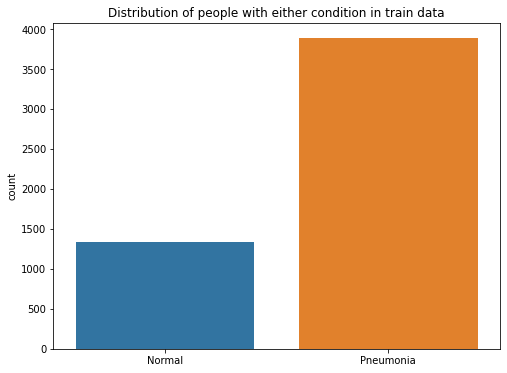


The total count for people without pneumonia is: 1341
----------------------------------------------------------------------------------
The total count for people with for pneuomonia is: 3885


In [ ]:
# creating countplot for total_counts_train

total_counts_train = []
pneu_len_train = 0
norm_len_train = 0

for i in total_train:
    if i[0] == 'p':
        total_counts_train.append('Pneumonia')
        pneu_len_train += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_train.append('Normal')
        norm_len_train += 1

plt.figure(figsize=(8, 6))
sns.countplot(x=total_counts_train)
plt.title('Distribution of people with either condition in train data')
plt.show()

print('\nThe total count for people without pneumonia is: {}'.format(norm_len_train))
print('----------------------------------------------------------------------------------')
print('The total count for people with for pneuomonia is: {}'.format(pneu_len_train))

### Test Set

In [ ]:
# combining all the test data 

total_test = test_norm_images + test_pneu_images
print('Total test data size is:', np.shape(total_test)[0])

Total test data size is: 624


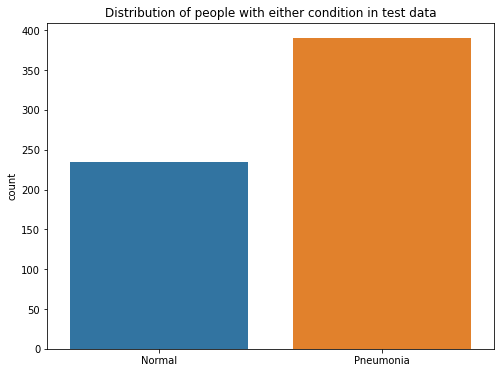


The total count for people without pneumonia is: 234
----------------------------------------------------------------------------------
The total count for people with for pneuomonia is: 390


In [ ]:
# creating countplot for total_counts_test

total_counts_test= []
pneu_len_test = 0
norm_len_test = 0

for i in total_test:
    if i[0] == 'p':
        total_counts_test.append('Pneumonia')
        pneu_len_test += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_test.append('Normal')
        norm_len_test += 1
        
plt.figure(figsize=(8, 6))
sns.countplot(x=total_counts_test)
plt.title('Distribution of people with either condition in test data')
plt.show()

print('\nThe total count for people without pneumonia is: {}'.format(norm_len_test))
print('----------------------------------------------------------------------------------')
print('The total count for people with for pneuomonia is: {}'.format(pneu_len_test))

## Reshaping and Normalizing the Data

This step is crucial to make the images in the data of uniform shapes/sizes in order to optimize the convergence when it comes to modelling.

In [ ]:
# store test and train directory paths as variables

train_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train'
test_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test'

In [ ]:
# setting some global variables

image_height = 156
image_width = 156

input_shape = (image_height, image_width, 3)

In [ ]:
# rescaling all images by 1./255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory for train data
        train_dir,
        # All images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_train),
        # using binary labels considering the business problem
        class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
        # This is the target directory for test data
        test_dir,
        # All images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_test),
        # using binary labels considering the business problem
        class_mode = 'binary')

Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# create new datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)


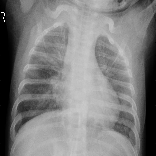

In [ ]:
# viewing an xray from the new dataset.

array_to_img(train_images[10])

In [ ]:
# viewing the labels

train_labels

array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)

In [ ]:
# shape of the new data

print('The new train shape is:', train_images.shape)
print('The new test shape is:', test_images.shape)

The new train shape is: (5226, 156, 156, 3)
The new test shape is: (624, 156, 156, 3)


In [ ]:
# identifying normal and pneumonia label notations

train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# defining the number of classes 

num_classes = 1

## Implementing the Solution

The identified solution to the problem statement is modelling the given data. Given that this is an image classification problem, Convolutional Neural Networks (CNN) would be ideal as they have better performance compared to other neural networks.


### Baseline Model

In [ ]:
# instantiating a baseline model

baseline_model = Sequential()

In [ ]:
# adding layers to the baseline model

baseline_model.add(Input(shape = input_shape))

baseline_model.add(Conv2D(32, (3, 3), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

baseline_model.add(Dense(num_classes, activation='sigmoid'))

In [75]:
# compiling the baseline model

baseline_model.compile(optimizer ='adam',
                       loss = "binary_crossentropy",
                       metrics = [tf.keras.metrics.Recall(), 
                                  tf.keras.metrics.Precision()])


In [76]:
# fit baseline model

result1 = baseline_model.fit(train_images, train_labels,
                   epochs = 5,
                   batch_size = 32,
                   validation_split = 0.2
                   )

Epoch 1/5
131/131 [==============================] - 69s 524ms/step - loss: 0.0159 - recall: 0.9961 - precision: 0.9981 - val_loss: 0.1365 - val_recall: 0.9642 - val_precision: 0.9869
Epoch 2/5
131/131 [==============================] - 73s 559ms/step - loss: 8.4663e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.1395 - val_recall: 0.9859 - val_precision: 0.9759
Epoch 3/5
131/131 [==============================] - 70s 535ms/step - loss: 3.5598e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.1442 - val_recall: 0.9872 - val_precision: 0.9747
Epoch 4/5
131/131 [==============================] - 69s 526ms/step - loss: 2.2768e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.1457 - val_recall: 0.9859 - val_precision: 0.9759
Epoch 5/5
131/131 [==============================] - 71s 542ms/step - loss: 1.6894e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.1423 - val_recall: 0.9834 - val_precision: 0.9771


In [ ]:
baseline_model.fit()

In [64]:
sk_model = scikit_learn.KerasClassifier(baseline_model, epochs = 5, batch_size = 32, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
# def plotting_visualizations(accuracy, validation_accuracy, loss, validation_loss, epochs):
#   title_font_dict = {'size': 14}
#   labels_font_dict = {'size': 12}

#   plt.subplots(1, 2, 1)

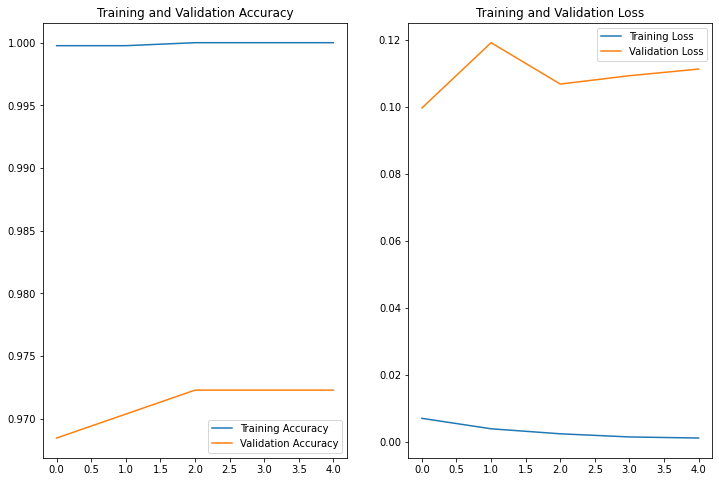

In [32]:
# # visualizing the baseline model's results

# acc = result1.history["accuracy"]
# val_acc = result1.history["val_accuracy"]

# loss = result1.history["loss"]
# val_loss = result1.history["val_loss"]

# epochs_range = range(5)
# title_font_dict = {'size': 14}
# labels_font_dict = {'size': 12}

# plt.figure(figsize=(12,8))

# # training and validation accuracy

# plt.subplot(1, 2, 1)

# plt.plot(epochs_range, acc, label = "Training Accuracy")
# plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
# plt.legend()
# plt.xlabel('Epochs', labels_font_dict)
# plt.ylabel('Accuracy', labels_font_dict)
# plt.title("Training and Validation Accuracy", title_font_dict)


# #training and validation loss

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label = "Training Loss")
# plt.plot(epochs_range, val_loss, label = "Validation Loss")
# plt.legend()
# plt.title("Training and Validation Loss")

# plt.show()

Based on the 

In [36]:
### First Dropout Model

In [33]:
# build deep learning model using relu and sigmoid activation functions
model = Sequential()
model.add(Input(shape=(156,156,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# compiling and fitting the model

model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
result2 = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_split= 0.2)

Epoch 1/20
131/131 [==============================] - 118s 895ms/step - loss: 0.1319 - accuracy: 0.9562 - val_loss: 0.1332 - val_accuracy: 0.9570
Epoch 2/20
131/131 [==============================] - 116s 886ms/step - loss: 0.1149 - accuracy: 0.9644 - val_loss: 0.1040 - val_accuracy: 0.9503
Epoch 3/20
131/131 [==============================] - 114s 873ms/step - loss: 0.1204 - accuracy: 0.9656 - val_loss: 0.0961 - val_accuracy: 0.9570
Epoch 4/20
131/131 [==============================] - 117s 897ms/step - loss: 0.0991 - accuracy: 0.9713 - val_loss: 0.0910 - val_accuracy: 0.9618
Epoch 5/20
131/131 [==============================] - 115s 880ms/step - loss: 0.1024 - accuracy: 0.9677 - val_loss: 0.1616 - val_accuracy: 0.9560
Epoch 6/20
131/131 [==============================] - 115s 876ms/step - loss: 0.0992 - accuracy: 0.9722 - val_loss: 0.0990 - val_accuracy: 0.9608
Epoch 7/20
131/131 [==============================] - 115s 876ms/step - loss: 0.0955 - accuracy: 0.9718 - val_loss: 0.0903 -

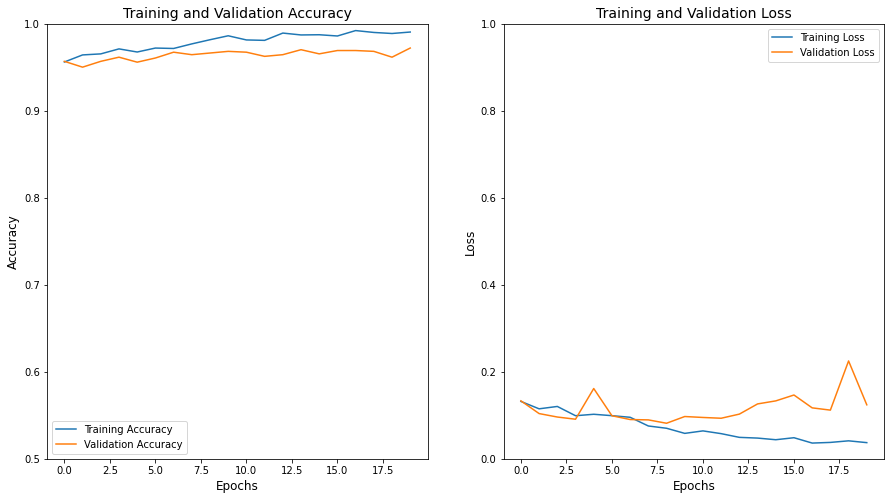

In [59]:
# visualizing the baseline model's results

acc2 = result2.history["accuracy"]
val_acc2 = result2.history["val_accuracy"]

loss2 = result2.history["loss"]
val_loss2 = result2.history["val_loss"]

epochs_range2 = range(20)

title_font_dict = {'size': 14}
labels_font_dict = {'size': 12}

plt.figure(figsize=(15,8))

# training and validation accuracy

plt.subplot( 1, 2, 1)

plt.plot(epochs_range2, acc2, label = "Training Accuracy")
plt.plot(epochs_range2, val_acc2, label = "Validation Accuracy")

plt.ylim([0.5, 1])

plt.xlabel('Epochs', labels_font_dict)
plt.ylabel('Accuracy', labels_font_dict)
plt.title("Training and Validation Accuracy", title_font_dict)
plt.legend()

#training and validation loss

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss2, label = "Training Loss")
plt.plot(epochs_range, val_loss2, label = "Validation Loss")

plt.ylim([0, 1])

plt.xlabel('Epochs', labels_font_dict)
plt.ylabel('Loss', labels_font_dict)
plt.title("Training and Validation Loss", title_font_dict)
plt.legend()

plt.show()

## Challenging the Solution